## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from numpy import arange
from matplotlib.ticker import MaxNLocator
from pathlib import Path
import matplotlib.dates as mdates

## Configurações

In [2]:
data_path = Path(r'..\..\01_dados\dados_hidraulicas_mre_x_dados_ons\ccee_hidraulicas_mre_x_dados_ons.csv')
save_data_path = Path(r'..\..\01_dados\02_dados_agregados')
plot_path = Path(r'..\..\05_plots')

warnings.filterwarnings('ignore')

## Funções e Classes Auxilires

In [3]:
def aggregate_and_analyze(df):
    df['din_instante'] = pd.to_datetime(df['din_instante'])
    df.set_index('din_instante', inplace=True)

    # Resampling to daily and calculating mean, median, std_dev
    daily_avg = df['cmo'].resample('D').mean()
    mean = daily_avg.mean()
    median = daily_avg.median()
    std_dev = daily_avg.std()

    return daily_avg, mean, median, std_dev

def calcular_estatisticas(df):
    # Remover a coluna 'din_instante' antes de calcular as estatísticas
    df = df.drop(columns='din_instante', errors='ignore')
    
    # Selecionar apenas colunas numéricas
    df_numeric = df.select_dtypes(include=[np.number])
    
    # Calcular média, mediana, máximo, mínimo e amplitude para cada coluna numérica
    estatisticas = pd.DataFrame({
        'media': df_numeric.mean(),
        'mediana': df_numeric.median(),
        'maximo': df_numeric.max(),
        'minimo': df_numeric.min()
    })
    # Calcular a amplitude (diferença entre o máximo e o mínimo)
    estatisticas['amplitude'] = estatisticas['maximo'] - estatisticas['minimo']
    return estatisticas

## Importação dos dados

In [4]:
df = pd.read_csv(data_path)
df.din_instante = pd.to_datetime(df.din_instante)
df.cmo = df.cmo.apply(lambda x: x.replace(',','.'))
df.cmo = pd.to_numeric(df.cmo)
df

,din_instante,cmo,id_subsistema,"Geração no Centro de Gravidade - MW médios (Gp,j) - MWh","Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)","Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*","Deslocamento Hidráulico Energético Preliminar (DH_ENER_PRE_UHp,j)","Garantia física modulada ajustada pelo fator de disponibilidade (GFIS_2p,j)","Garantia Física de Repasse de Risco Hidrológico Modulada e Ajustada (GFIS_2_RRHp,j) - MWh","Garantis Física Modulada Ajustada de Repasse do Risco Hidrológico (GFIS_3_RRHp,j) - MWh",...,val_verifunitcommitment,val_verifconstrainedoff,val_importacaoprogramada,val_importacaodespachada,val_importacaoverificada,val_preco_importacao,val_dispf,val_indisppf,val_indispff,val_intercambiomwmed
0,2018-04-17 00:00:00,154.51,NE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,2018-04-18 00:00:00,151.46,NE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2018-04-19 00:00:00,0.04,NE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,2018-04-20 00:00:00,110.13,NE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,2018-04-21 00:00:00,129.45,NE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364219,2023-08-10 23:30:00,0.00,SE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364220,2023-08-11 23:30:00,0.00,SE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364221,2023-08-12 23:30:00,0.00,SE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364222,2023-08-13 23:30:00,0.00,SE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Preparação dos Dados

In [5]:
cols_to_drop = [
    'val_vazaoincremental',
    'ena_armazenavel_regiao_percentualmlt',
    'ena_armazenavel_regiao_mwmed',
    'ena_bruta_regiao_percentualmlt',
    'ena_bruta_regiao_mwmed',
    'ear_verif_subsistema_percentual',
    'ear_verif_subsistema_mwmes',
    'ear_max_subsistema',
    'val_vazaoevaporacaoliquida',
    'val_vazaousoconsuntivo',
    'val_vazaoartificial',
    'val_vazaonatural',
    'val_vazaotransferida',
    'val_vazaodefluente',
    'val_vazaooutrasestruturas',
    'val_vazaovertida_x',
    'val_vazaoturbinada_x',
    'val_vazaoafluente',
    'val_volumeutilcon',
    'val_niveljusante',
    'val_nivelmontante'
]

df.drop(cols_to_drop, axis=1, inplace=True)

Separando os dados por Subsistema

In [6]:
df_s = df[df['id_subsistema'] == 'S']
df_se = df[df['id_subsistema'] == 'SE']
df_n = df[df['id_subsistema'] == 'N']
df_ne = df[df['id_subsistema'] == 'NE']

In [7]:
# lista para faciltiar a iteração entre os dataframes
df_list = [df_s, df_se, df_n, df_ne]

Ordenando os dados por tempo

In [8]:
for data in df_list:
    data.sort_values(by='din_instante', inplace=True)

In [9]:
# Applying the function to each region's dataframe
daily_avg_s, mean_s, median_s, std_dev_s = aggregate_and_analyze(df_s)
daily_avg_se, mean_se, median_se, std_dev_se = aggregate_and_analyze(df_se)
daily_avg_n, mean_n, median_n, std_dev_n = aggregate_and_analyze(df_n)
daily_avg_ne, mean_ne, median_ne, std_dev_ne = aggregate_and_analyze(df_ne)

In [10]:
# Imprimindo as medidas centrais para comparação
print("Sul - Média:", mean_s, "Mediana:", median_s, "Desvio Padrão:", std_dev_s)
print("Sudeste - Média:", mean_se, "Mediana:", median_se, "Desvio Padrão:", std_dev_se)
print("Norte - Média:", mean_n, "Mediana:", median_n, "Desvio Padrão:", std_dev_n)
print("Nordeste - Média:", mean_ne, "Mediana:", median_ne, "Desvio Padrão:", std_dev_ne)

Sul - Média: 234.57415085222283 Mediana: 124.17166666666667 Desvio Padrão: 378.5151867127721
Sudeste - Média: 232.50836649973644 Mediana: 118.96291666666667 Desvio Padrão: 379.44364210193083
Norte - Média: 197.66338703654893 Mediana: 82.31375 Desvio Padrão: 358.59706901441535
Nordeste - Média: 201.31295104111757 Mediana: 92.28625 Desvio Padrão: 343.1601484320307


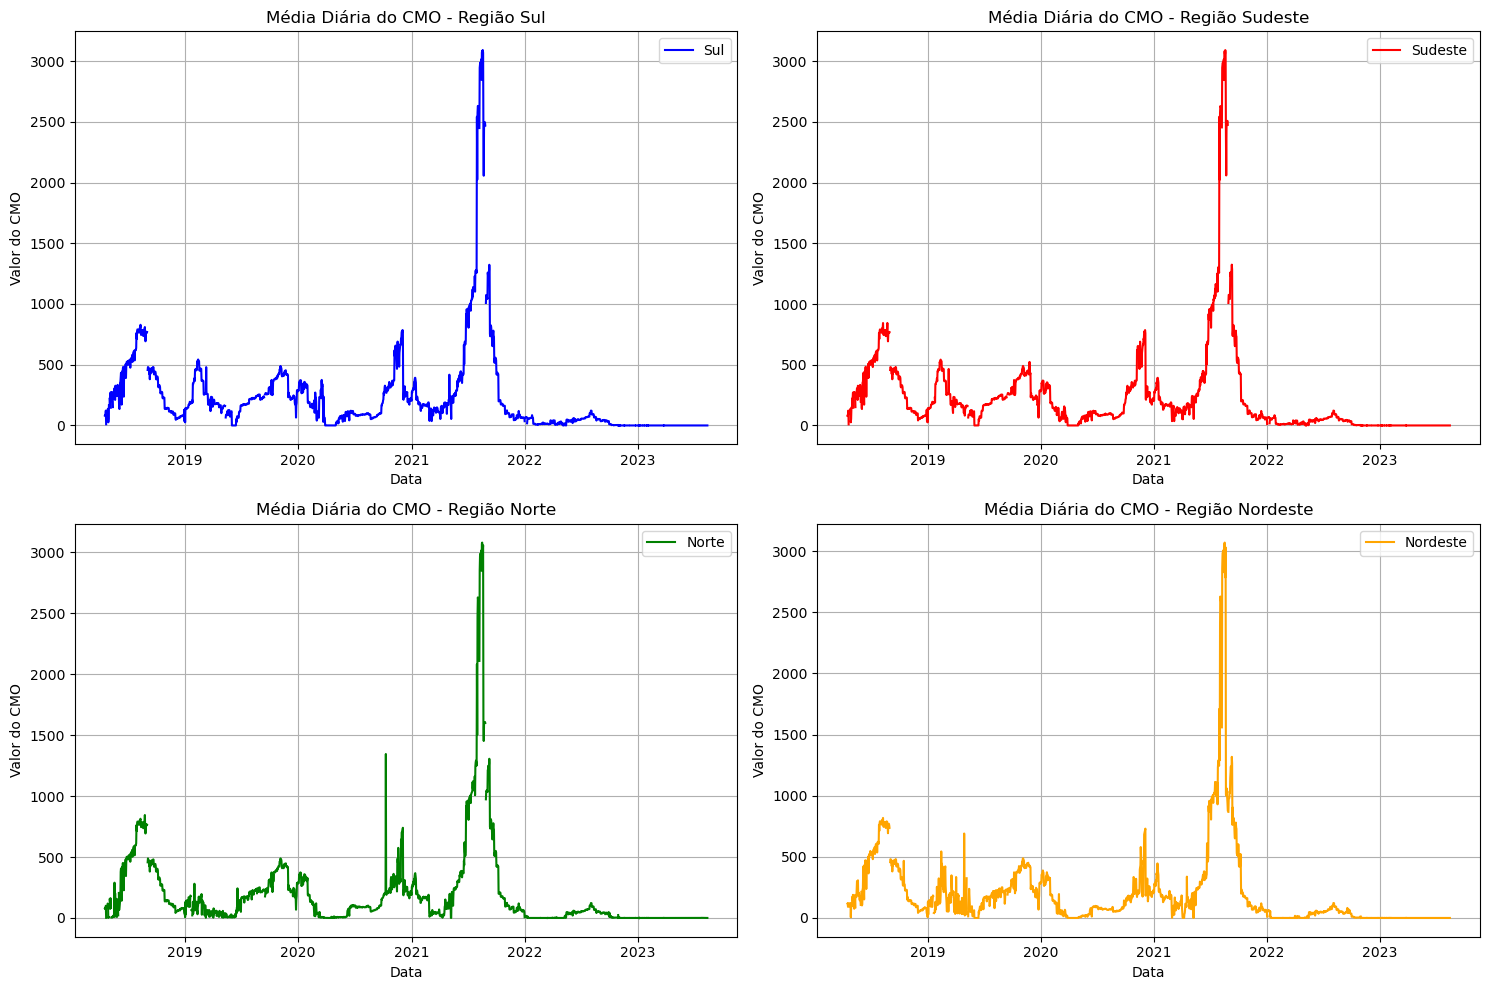

In [11]:
# Plotando as médias diárias para cada região em uma grade 2x2 para uma comparação mais clara

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Sul
axes[0, 0].plot(daily_avg_s, label='Sul', color='blue')
axes[0, 0].set_title('Média Diária do CMO - Região Sul')
axes[0, 0].set_xlabel('Data')
axes[0, 0].set_ylabel('Valor do CMO')
axes[0, 0].grid(True)
axes[0, 0].legend()

# Sudeste
axes[0, 1].plot(daily_avg_se, label='Sudeste', color='red')
axes[0, 1].set_title('Média Diária do CMO - Região Sudeste')
axes[0, 1].set_xlabel('Data')
axes[0, 1].set_ylabel('Valor do CMO')
axes[0, 1].grid(True)
axes[0, 1].legend()

# Norte
axes[1, 0].plot(daily_avg_n, label='Norte', color='green')
axes[1, 0].set_title('Média Diária do CMO - Região Norte')
axes[1, 0].set_xlabel('Data')
axes[1, 0].set_ylabel('Valor do CMO')
axes[1, 0].grid(True)
axes[1, 0].legend()

# Nordeste
axes[1, 1].plot(daily_avg_ne, label='Nordeste', color='orange')
axes[1, 1].set_title('Média Diária do CMO - Região Nordeste')
axes[1, 1].set_xlabel('Data')
axes[1, 1].set_ylabel('Valor do CMO')
axes[1, 1].grid(True)
axes[1, 1].legend()

plt.tight_layout()

Os valores de medidas centrais ficaram muito próximos, vamos análisar então o valor do cmo de forma separada para cada Região.

In [12]:
daily_mean_s = df_s.resample('D').mean()
daily_mean_se = df_se.resample('D').mean()
daily_mean_n = df_n.resample('D').mean()
daily_mean_ne = df_ne.resample('D').mean()

In [13]:
daily_mean_s.to_csv(save_data_path / 'dados_sul.csv')
daily_mean_se.to_csv(save_data_path / 'dados_sudeste.csv')
daily_mean_n.to_csv(save_data_path / 'dados_norte.csv')
daily_mean_ne.to_csv(save_data_path / 'dados_nordeste.csv')